<a href="https://colab.research.google.com/github/yantraguru/deeplearn/blob/master/1_neuron_vs_layer_of_many_for_guessing_complex_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
print( tf.VERSION )

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_absolute_error

from matplotlib import pyplot

1.14.0


In [0]:
function_to_learn = lambda x : 2*x+0.3*x**2+(0.001*x**3)

In [0]:
LOWER_LIMIT = -5
UPPER_LIMIT = 5
MAX_ITER = 5000

In [4]:
X = np.random.uniform(low=LOWER_LIMIT, high=UPPER_LIMIT, size=(1000 ,1)).astype("float32")
print(X[0:5])

[[-4.1376777 ]
 [-3.9848478 ]
 [-0.36576796]
 [ 2.6159167 ]
 [ 0.0513682 ]]


In [5]:
y = np.array([function_to_learn(x) for x in X]).astype("float32")
print(y[0:5])

[[-3.2100809 ]
 [-3.269267  ]
 [-0.691449  ]
 [ 7.3026404 ]
 [ 0.10352814]]


In [0]:
X_val = np.random.uniform(low=LOWER_LIMIT, high=UPPER_LIMIT, size=(100 ,1)).astype("float32")
y_val = np.array([function_to_learn(x) for x in X_val]).astype("float32")

X_test = np.random.uniform(low=LOWER_LIMIT, high=UPPER_LIMIT, size=(50 ,1)).astype("float32")
y_test = np.array([function_to_learn(x) for x in X_test]).astype("float32")

In [0]:
MX_LIM = np.max(np.vstack([X,X_val,X_test,y,y_val,y_test]))
X,X_val,X_test,y,y_val,y_test = [arr/MX_LIM for arr in[X,X_val,X_test,y,y_val,y_test]]

In [8]:
n_1_lin_model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
n_1_lin_model.compile(optimizer='sgd', loss='mean_squared_error')
n_1_lin_model.summary()

W0725 04:14:19.386645 140212361934720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

In [10]:
%time history = n_1_lin_model.fit(X, y, epochs=MAX_ITER, verbose=0, validation_data=(X_val,y_val), callbacks=[es_callback])

Epoch 00303: early stopping
CPU times: user 9.55 s, sys: 462 ms, total: 10 s
Wall time: 8.76 s


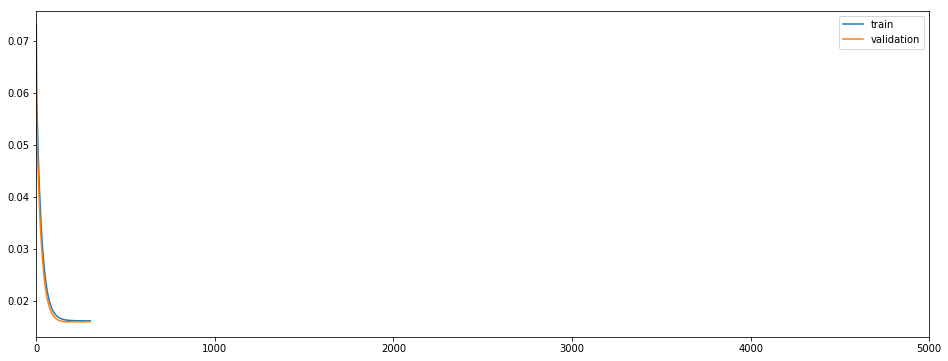

In [11]:
pyplot.figure(num=None, figsize=(16, 6))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.xlim(0, MAX_ITER)
pyplot.show()

In [0]:
y_predict = n_1_lin_model.predict(X_test)

In [13]:
pd.DataFrame({'input' : (X_test*MX_LIM).astype("float16").flatten(),
              'actual_answer' : (y_test*MX_LIM).astype("float16").flatten(),
              'answer_from_net':(y_predict*MX_LIM).astype("float16").flatten()}).sample(5)

,input,actual_answer,answer_from_net
32,4.519531,15.250000,11.554688
28,1.258789,2.996094,5.011719
36,-3.070312,-3.341797,-3.685547
4,-4.816406,-2.785156,-7.195312
13,-2.406250,-3.089844,-2.353516


In [14]:
print('Mean error of single neuron linear model : %.3f' % (mean_absolute_error(y_test, n_1_lin_model.predict(X_test)) * MX_LIM))

Mean error of single neuron linear model : 1.872


In [15]:
n_32_lin_model = tf.keras.Sequential()
n_32_lin_model.add(keras.layers.Dense(units=32, input_shape=[1]))
n_32_lin_model.add(keras.layers.Dense(units=1))
n_32_lin_model.compile(optimizer='sgd', loss='mean_squared_error')
n_32_lin_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [16]:
%time history = n_32_lin_model.fit(X, y, epochs=MAX_ITER, verbose=0, validation_data=(X_val,y_val), callbacks=[es_callback])

Epoch 00153: early stopping
CPU times: user 5.74 s, sys: 260 ms, total: 6 s
Wall time: 5.12 s


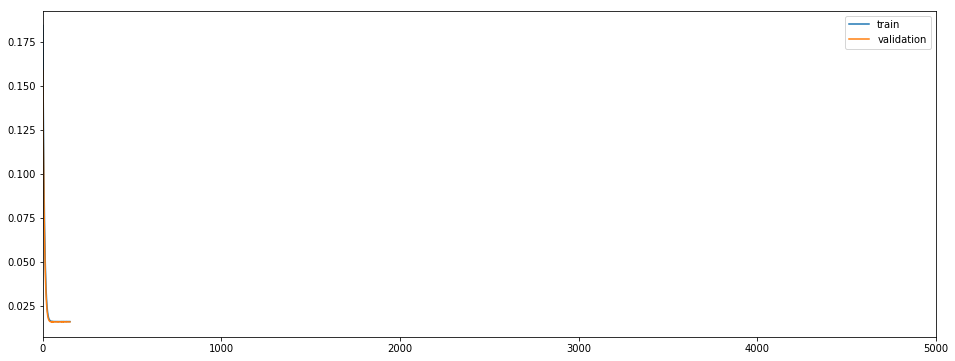

In [17]:
pyplot.figure(num=None, figsize=(16, 6))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.xlim(0, MAX_ITER)
pyplot.show()

In [0]:
y_predict = n_32_lin_model.predict(X_test)

In [19]:
pd.DataFrame({'input' : (X_test*MX_LIM).astype("float16").flatten(),
              'actual_answer' : (y_test*MX_LIM).astype("float16").flatten(),
              'answer_from_net':(y_predict*MX_LIM).astype("float16").flatten()}).sample(5)

,input,actual_answer,answer_from_net
43,3.183594,9.437500,8.882812
32,4.519531,15.250000,11.570312
19,-1.780273,-2.615234,-1.121094
47,-4.617188,-2.937500,-6.835938
21,-4.812500,-2.787109,-7.234375


In [20]:
print('Mean error of 32 neuron linear model : %.3f' % (mean_absolute_error(y_test, y_predict) * MX_LIM))

Mean error of 32 neuron linear model : 1.874


In [21]:
n_32_relu_model = tf.keras.Sequential()
n_32_relu_model.add(keras.layers.Dense(units=32, activation='relu', input_shape=[1]))
n_32_relu_model.add(keras.layers.Dense(units=1))
n_32_relu_model.compile(optimizer='sgd', loss='mean_squared_error')
n_32_relu_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [22]:
%time history = n_32_relu_model.fit(X, y, epochs=MAX_ITER, verbose=0, validation_data=(X_val,y_val), callbacks=[es_callback])

CPU times: user 3min 3s, sys: 8.38 s, total: 3min 12s
Wall time: 2min 44s


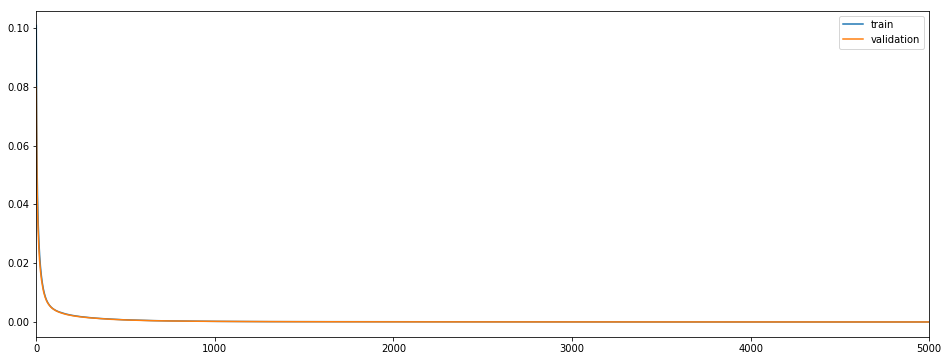

In [23]:
pyplot.figure(num=None, figsize=(16, 6))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.xlim(0, MAX_ITER)
pyplot.show()

In [0]:
y_predict = n_32_relu_model.predict(X_test)

In [25]:
pd.DataFrame({'input' : (X_test*MX_LIM).astype("float16").flatten(),
              'actual_answer' : (y_test*MX_LIM).astype("float16").flatten(),
              'answer_from_net':(y_predict*MX_LIM).astype("float16").flatten()}).sample(5)

,input,actual_answer,answer_from_net
14,-2.111328,-2.894531,-2.894531
46,2.962891,8.585938,8.484375
30,-0.846680,-1.479492,-1.465820
19,-1.780273,-2.615234,-2.591797
42,-0.353027,-0.668945,-0.670898


In [26]:
print('Mean error of 32 neuron non linear model : %.3f' % (mean_absolute_error(y_test, y_predict) * MX_LIM))

Mean error of 32 neuron non linear model : 0.058
